Short example to show how to use the **Magnus#CW_fit** functions when starting from expansion coefficients rather than from expansions obtained from a data set

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from NeedALight.magnus import Magnus1CW_fit, Magnus3CW_fit_Re, Magnus3CW_fit_Im

In this section, we assume that we have knowledge of the taylor expansions of the dispersion relations such that

- $k_s(\omega) \approx a_{s}\omega+b_{s}\omega^2$
- $k_i(\omega) \approx a_{i}\omega+b_{i}\omega^2$

where we further assume that the expansions are made around central frequencies of interest (i.e. $\omega=\omega-\bar{\omega}_{central}$) and that when everything is evaluated at the central frequencies we have phase-matching (effectively setting $k_{pol}$ and $\bar{k}_{p}$ to 0). One can easily extend this formalism for higher order expansions.

To make use of the functions, we simply need to properly define 'poly1d' objects. We do so by constructing arrays consisting of the expansion coefficients in reverse order (start with highest order coefficient and go down until constant term)

In [61]:
#Setting up frequency grid
N= 201
#Frequency values
wi = -4
wf = 4
w = np.linspace(wi, wf, N)

#Crystal Length, in case one wants to work in different units
L=1 

#Constructing expansion polynomials
s_var = np.array([0.2, 1/0.01 , 0])  #Will give k_s = 1*w^2 +w/0.01 +0
i_var = np.array([0.1, 1/0.011 , 0]) #Will give k_i = 1*w^2 +w/0.011 +0

#In case one works without being around central frequencies
k_pol = 0 #poling wavevector
p_k = 0 #central pump wavevector


ks_poly = np.poly1d(s_var)
ki_poly = np.poly1d(i_var)

We now look at the different Magnus corrections terms. Note that one could express the expansion differently (i.e. not around central frequencies), just make sure to include the proper poling and pump wavectors such that you are phase-matched at the frequencies of interest (last two entries in the functions, respectively).

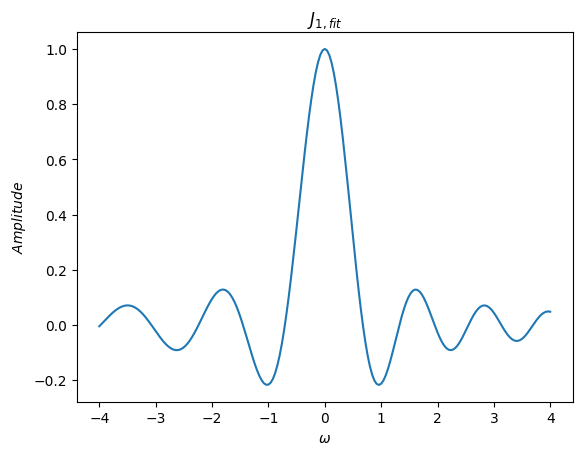

In [62]:
#J1 term
#First Order Magnus JSA
J1_fit = Magnus1CW_fit(w,-w,ks_poly,ki_poly,k_pol,p_k,L)
fig, ax1 = plt.subplots()

ax1.plot(w, J1_fit) 
ax1.set_xlabel(r"$\omega$")
ax1.set_ylabel(r"$Amplitude$")
ax1.set_title(r"$J_{1,fit}$")
plt.show()


We next consider the $J_3$ and $K_3$ contribution.

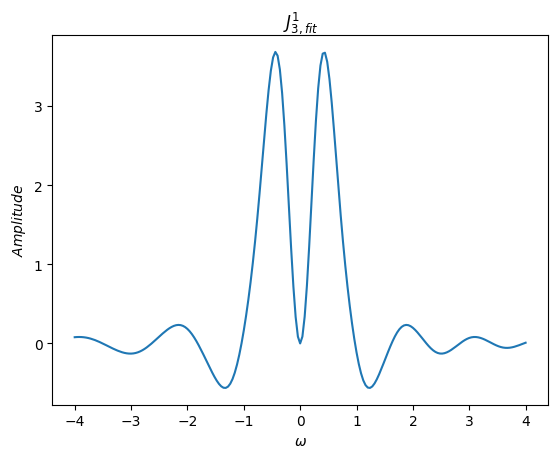

In [63]:
#First third order contribution
J3_fit = Magnus3CW_fit_Re(w,-w,ks_poly,ki_poly,k_pol,p_k,L)

fig, ax3 = plt.subplots()
ax3.plot(w, J3_fit)
ax3.set_xlabel(r"$\omega$")
ax3.set_ylabel(r"$Amplitude$")
ax3.set_title(r"$J_{3,fit}^1$")
plt.show()

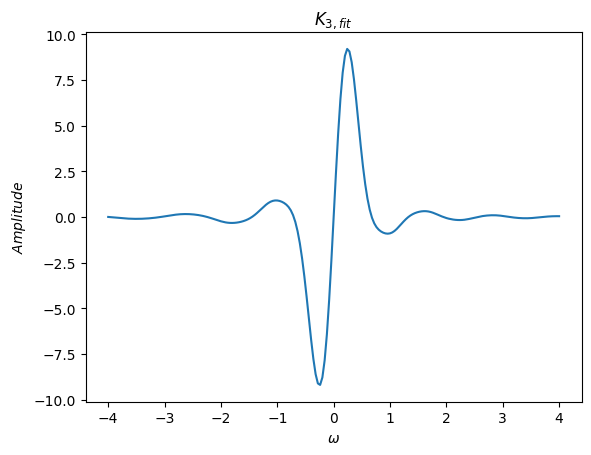

In [64]:
#K3 contrib
K3_fit = Magnus3CW_fit_Im(w,-w,ks_poly,ki_poly,k_pol,p_k,L)

fig, ax1 = plt.subplots()
ax1.plot(w, K3_fit)
ax1.set_xlabel(r"$\omega$")
ax1.set_ylabel(r"$Amplitude$")
ax1.set_title(r"$K_{3,fit}$")
plt.show()

Combining everything together, looking at both |JSA| and Intensity.

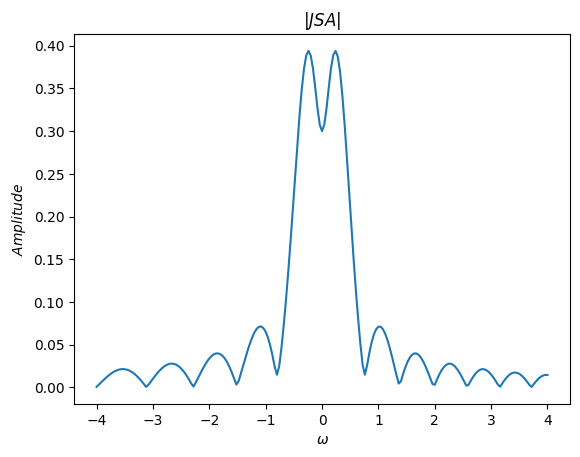

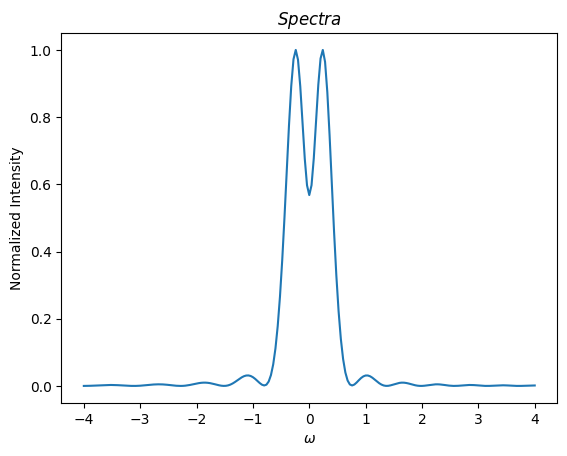

In [65]:
#Strength parameter for Magnus expansion
JSA_full_fit = lambda epsilon: epsilon*J1_fit+(epsilon**3)*(J3_fit -1j*K3_fit)

#Multiply by this phase if x0=0 is the start of the nonlinear region
Phase_fit = np.exp(1j*L*(ks_poly+ki_poly+k_pol-p_k)/2) 
epsilon = 0.3


fig, ax1 = plt.subplots()
ax1.plot(w, np.abs(JSA_full_fit(epsilon)))
ax1.set_xlabel(r"$\omega$")
ax1.set_ylabel(r"$Amplitude$")
ax1.set_title(r"$|JSA|$")
plt.show()

#Intensity
Intensity_fit = lambda epsilon: np.sinh(np.abs(JSA_full_fit(epsilon)))**2/np.amax(np.sinh(np.abs(JSA_full_fit(epsilon)))**2)

fig, ax2 = plt.subplots()
ax2.plot(w, Intensity_fit(epsilon))
ax2.set_xlabel(r"$\omega$")
ax2.set_ylabel(r"Normalized Intensity")
ax2.set_title(r"$Spectra$")
plt.show()

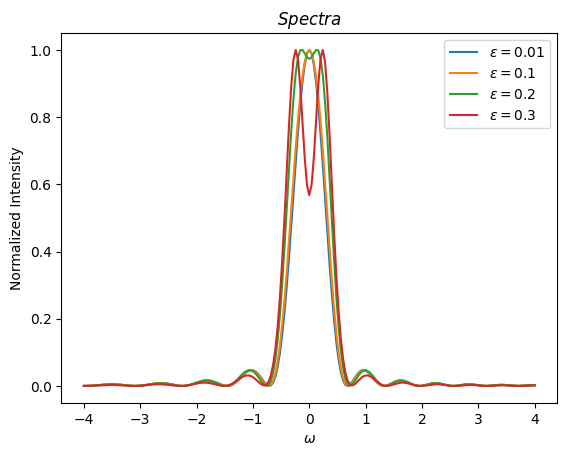

In [66]:
#Comparing for different values of interaction strength

fig, ax1 = plt.subplots()
ax1.plot(w, Intensity_fit(0.01),label=r"$\epsilon=0.01$")
ax1.plot(w, Intensity_fit(0.1),label=r"$\epsilon=0.1$")
ax1.plot(w, Intensity_fit(0.2),label=r"$\epsilon=0.2$")
ax1.plot(w, Intensity_fit(0.3),label=r"$\epsilon=0.3$")
ax1.set_xlabel(r"$\omega$")
ax1.set_ylabel(r"Normalized Intensity")
ax1.set_title(r"$Spectra$")
ax1.legend()
plt.show()